# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
# Importing the Dataset
df = pd.read_csv("1990sClassicHits_cleaned.csv")
df.head()

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
0,Everybody Everybody,Black Box,4:11,4,0.645,0.795,7,-12.095,1,0.0527,0.3470,0.003890,0.1040,0.535,112.067,87,1990
1,Close To You,Maxi Priest,3:45,4,0.590,0.727,6,-7.955,1,0.0706,0.0259,0.000065,0.0827,0.356,121.966,85,1990
2,Do Me!,Bell Biv DeVoe,3:56,4,0.615,0.534,9,-6.719,0,0.0386,0.1060,0.000018,0.0607,0.193,135.917,84,1990
3,Everything,Jody Watley,4:05,4,0.704,0.225,6,-14.454,0,0.0994,0.9020,0.657000,0.1060,0.243,120.006,82,1990
4,What It Takes,Aerosmith,3:21,4,0.672,0.655,10,-5.021,0,0.0310,0.0362,0.000000,0.1170,0.555,134.948,82,1990


## Data Understanding and Cleaning Summary

### Are there any missing values?

In [74]:
#identifying missing values
print("Number of missing values by column:\n")
df.isnull().sum()

Number of missing values by column:



Track               0
Artist              0
Duration            0
Time_Signature      0
Danceability        0
Energy              0
Key                 0
Loudness            0
Mode                0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Popularity          0
Year                0
dtype: int64

**There are no missing values**

### Are there any duplicated rows?

In [77]:
#checking for duplicate rows
duplicates_num = df.duplicated().sum()
duplicates_num

0

**There are no duplicate rows**

# Section 1: Individual, Comparative, and Grouped Visualizations

In [46]:
#Copy of data to edit
df_working = df.copy()
df_working1 = df.copy()

## Comparing across categories

**Exploring averages across categories**
* Category: Artist
* Variable 1: Popularity
* Variable 2: Danceability

In [45]:
#Using .groupby() and visualization to compare values across categories
    #new df with relevant columns using .loc function
group_df = df_working.loc[:, ["Track", "Artist", "Popularity", "Danceability"]]

#count how many times each  artist appears and show top 10
artist_counts = group_df["Artist"].value_counts().head(10)
    #list of top 10 artist names
top_artists_feat = artist_counts.index.tolist() 

#filtering dataframe to top 10 featured artists
top_featartist_df = group_df[group_df["Artist"].isin(top_artists_feat)]

#Grouping by Artist to find averages of popularity and danceability (reset index to make all variables columns)
top_artist_grouped = top_featartist_df.groupby("Artist")[["Popularity", "Danceability"]].mean().reset_index()

#Sort artists by how frequently they appear (most to least tracks)
top_artist_grouped = top_artist_grouped.set_index("Artist").loc[top_artists_feat].reset_index()
print("Top 10 Artists with the most feautred tracks:\n")
top_artist_grouped

Top 10 Artists with the most feautred tracks:



,Artist,Popularity,Danceability
0,Mariah Carey,61.625000,0.566438
1,Madonna,57.428571,0.522571
2,Janet Jackson,59.923077,0.626462
3,Boyz II Men,52.818182,0.558545
4,Whitney Houston,53.600000,0.573400
5,TLC,60.888889,0.658333
6,Michael Bolton,55.625000,0.512875
7,Bryan Adams,45.428571,0.537857
8,Aerosmith,66.000000,0.543143
9,Color Me Badd,55.000000,0.578286


### Graph 1: Top 10 Most Featured Artists: Popularity vs Danceability

In [ ]:
#copy of extracted df
top_artist_grouped_copy = top_artist_grouped.copy()

#Rescaling Danceability to 0-100 scale for visual comparison with Popularity
top_artist_grouped_copy["Danceability"] = top_artist_grouped_copy["Danceability"] * 100

In [40]:
#Side-by-side bar chart using melt function
melted_pop = top_artist_grouped_copy.melt(
    id_vars = "Artist", value_vars = ["Popularity", "Danceability"],
    var_name = "Metric", value_name = "Value"
)

In [41]:
#Checking scaled values for variables 1 and 2
top_artist_grouped_copy[["Popularity", "Danceability"]]

,Popularity,Danceability
0,61.625000,56.643750
1,57.428571,52.257143
2,59.923077,62.646154
3,52.818182,55.854545
4,53.600000,57.340000
5,60.888889,65.833333
6,55.625000,51.287500
7,45.428571,53.785714
8,66.000000,54.314286
9,55.000000,57.828571


### Plot grouped bar chart

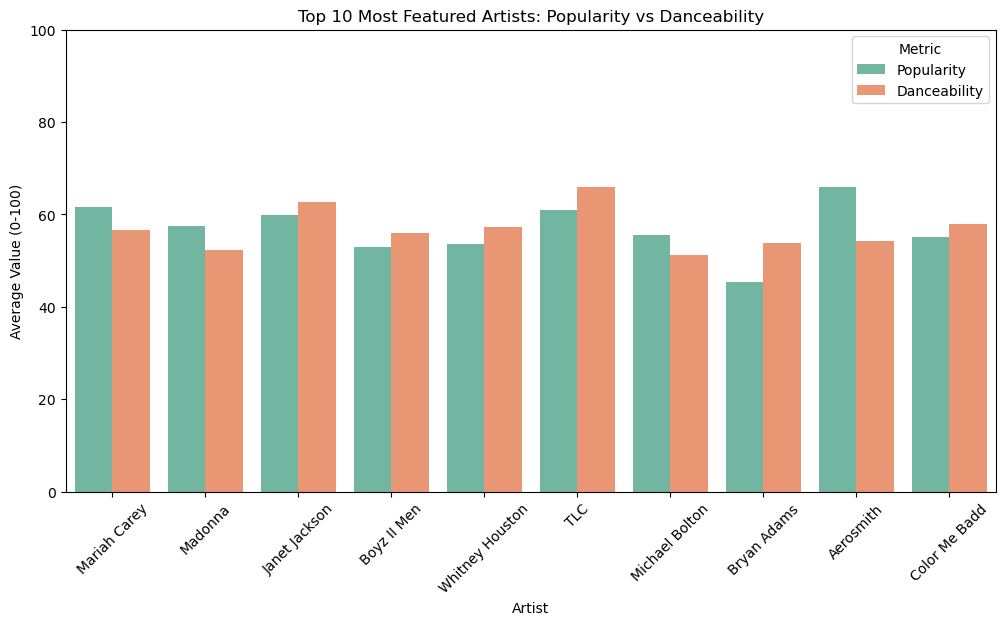

In [42]:
#Plot grouped bar chart

#Set figure size for readability
plt.figure(figsize = (12,6))

#Creating the grouped bar chart
sns.barplot(
    data = melted_pop,   # narrow dataframe with Artist, Metric, and Value
    x = "Artist",        # x-axis shows each artist
    y = "Value",         # y-axis shows average popularity and danceability
    hue = "Metric",      # separates bars by "Popularity" and "Danceability"
    palette = "Set2"     # sets a pastel color palette
)

#Adding chart title and axis labels
plt.title("Top 10 Most Featured Artists: Popularity vs Danceability")
plt.xlabel("Artist")
plt.ylabel("Average Value (0-100)")   #both variables are on the same 0-100 scale for comparison

#Rotate x-axis labels for better visibility
plt.xticks(rotation = 45)

#Adding a legend with custom title
plt.legend(title = "Metric")

#Setting y-axis limits to match the scale of both variables
plt.ylim(0, 100)

#Adjusting spacing
plt.tight_layout

#Displaying the plot
plt.show()

**Figure 1.**
This grouped bar chart compares the average Popularity and Danceability of the top 10 most frequently featured artists in the 90s hits dataset. These artists had the highest number of tracks included, indicating their consistent presence across the decade. 

To make this comparison visually meaningful, I scaled Danceability values to the same 0-100 range as Popularity. This does not change the rankings of danceability among artists, it simply makes both metrics easier to compare on the same graph.

### Interpretation

**Mariah Carey**, **Whitney Houston**, and **TLC** appear at the top in terms of both **visibility** and **strong average popularity**, showing their dominant presence in the 1990s charts.

**TLC** also has one of the **highest danceability scores**, while **Color Me Badd** and **Michael Bolton** have relatively **lower popularity** or **lower danceability**. This suggests that **frequent appearane doesn't always mean a balance of both**.

## Boxplot for a numerical column (Tempo)

* Category: Artist
* Numerical variable: Tempo (BPM)

In [51]:
#New list of 10 most featured artists
top_artists1 = df_working1["Artist"].value_counts().head(10).index.tolist()

#New df with these artists
top_featartist_df1 = df_working1[df_working1["Artist"].isin(top_artists1)].copy()


### Graph 2: Tempo Distribution by Top 10 Most Featured 90s Artists

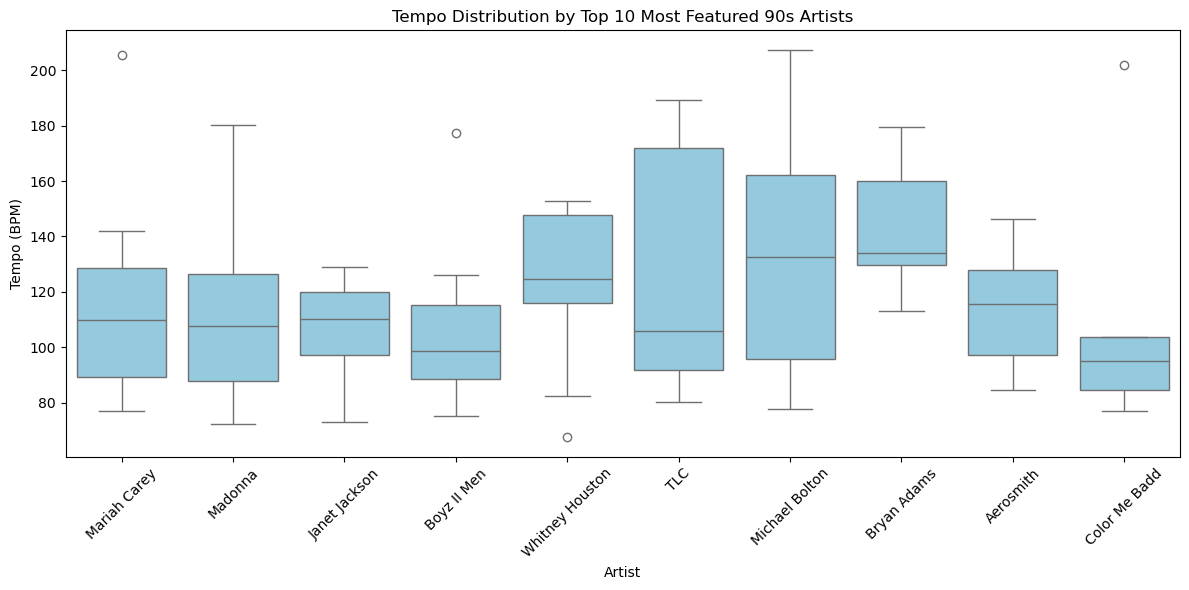

In [55]:
#Plot boxplot

#Setting figure size for readability
plt.figure(figsize = (12,6))

#Creating a grouped bar chart
sns.boxplot(
    data = top_featartist_df1,  # narrow dataframe with Artist, Metric, and Value
    x = "Artist",               # x-axis shows each artist
    y = "Tempo",                # y-axis shows tempo
    order = top_artists1,       # orders artists by most to least featured
    color = "skyblue"           # keeping the same color for each boxplot
)

#Adding chart title and axis labels
plt.title("Tempo Distribution by Top 10 Most Featured 90s Artists")
plt.xlabel("Artist")
plt.ylabel("Tempo (BPM)")

#Rotating x-axis labels for better visibility
plt.xticks(rotation = 45)

#Adjusting spacing
plt.tight_layout()

#Displaying the plot
plt.show()

**Figure 2.** This boxplot visualizes the distribution of tempo (in BPM) for the 10 most frequently featured artists in the 1990s hits dataset. Each box represents the **median tempo** (line inside the box), the **interquartile range** (the middle 50% of values), and the **whiskers and dots** showing outliers or wider tempo ranges.


### Interpretation

**TLC** has the widest spread in tempo based on the interquartile range (~ 80 BPM), reflecting their versatility. 
**Michael Bolton** also shows a wide tempo spread with the biggest difference between his slowest and fastest songs. **Michael Bolton** and **Brian Adams** have the **highest median tempos (~ 130-134 BPM)** despite the stark difference in their spreads. **Color Me Badd** has the tightest spread with a **low median (~ 95 BPM)**, showing a more consistent tempo across their songs.

This plot shows that even the most featured artists in the 90s had very different tempo profiles, with some a maintaining consistent rhythmic identity and others explored a wide range of musical spacing. 

# Section 2: Relationship Visualizations

## Visualizing relationships between two numerical variables

**Scatterplot 1:**
* Variable 1: Tempo (BPM)
* Variable 2: Popularity

**Scatterplot 2:**
* Variable 1: Loudness (dB)
* Variable 2: Popularity

In [56]:
#Copy of df
df_working2 = df.copy()

In [82]:
#Calculating Pearson correlation coefficients
tempo_corr = df_working2[["Tempo", "Popularity"]].corr().loc["Tempo", "Popularity"]
loudness_corr = df_working2[["Loudness", "Popularity"]].corr().loc["Loudness", "Popularity"]

print("Correlation between Tempo and Popularity:", tempo_corr)
print("Correlation betwen Loudness and Popularity:", loudness_corr)

Correlation between Tempo and Popularity: 0.00027655313493683153
Correlation betwen Loudness and Popularity: 0.0890278618082326


To support the visualizations, I first calculated the Pearson correlation coefficients
* **Tempo and Popularity:** r = 0.0003
* **Loudness and Popularity:** r = 0.089

### Graph 3: Tempo v Popularity and Loudness v Popularity

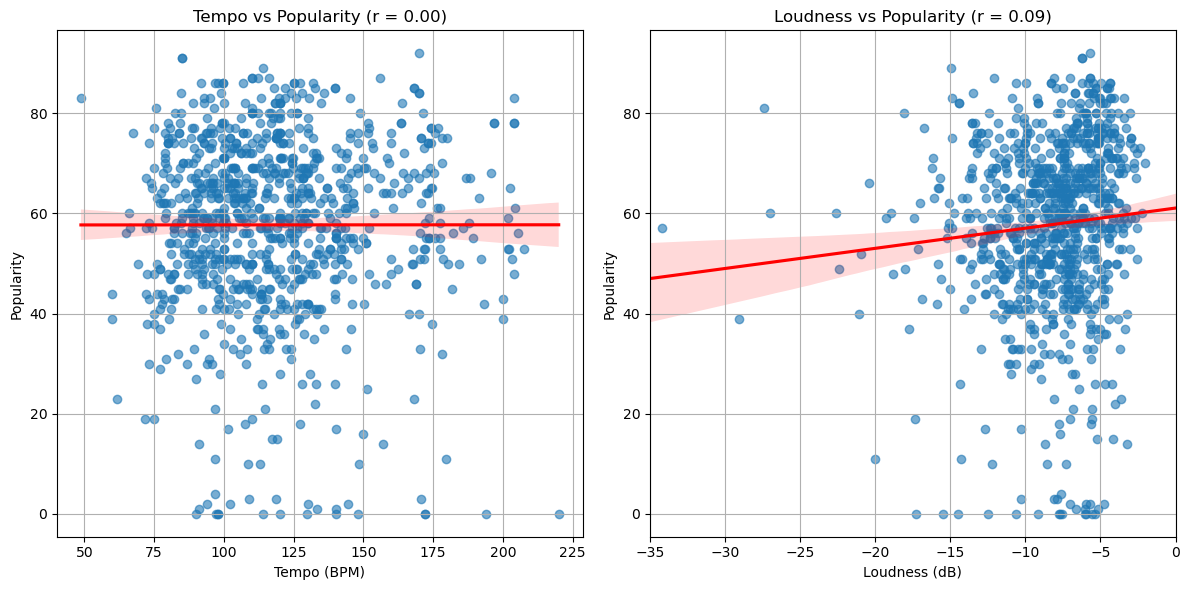

In [80]:
#Creating a 1x2 grid
fig, axes = plt.subplots(1, 2, figsize = (12, 6))

#Scattter plot 1: Tempo vs Popularity
sns.regplot(
    data = df_working2,
    x = "Tempo",
    y = "Popularity",
    #alpha = 0.6,
    ax = axes[0],
    scatter_kws = {"alpha": 0.6},  # transparent points for clarity
    line_kws = {"color": "red"},   # red trend line
)
axes[0].set_title("Tempo vs Popularity (r = 0.00)") # setting title (including correlation)
axes[0].set_xlabel("Tempo (BPM)")
axes[0].set_ylabel("Popularity")
axes[0].grid(True)

#Scatter plot 2: Loudness vs Popularity
sns.regplot(
    data = df_working2,
    x = "Loudness",
    y = "Popularity",
    #alpha = 0.6,
    ax = axes[1],
    scatter_kws = {"alpha": 0.6},
    line_kws = {"color": "red"},
)
axes[1].set_title("Loudness vs Popularity (r = 0.09)")
axes[1].set_xlabel("Loudness (dB)")
axes[1].set_ylabel("Popularity")
axes[1].set_xlim(-35, 0)         # zooming in on relevant range for better visibility
axes[1].grid(True)

#Adjusting layout to avoid overlapping labels
plt.tight_layout()
plt.show()

**Figure 3.** This 1x2 scatterplot grid compares the relationship between two musical features- **tempo** and **loudness**- and a song's **popularity**. Each subplot includes a regression line to highlight potential trends.

### Interpretation

In the **Tempo vs Popularity** plot, the points are widely scattered with **no visible trend** and a correlation close to zero **(r = 0.00)**. This shows that in the 90s, faster songs weren't necessarily more popular. In the **Loudness vs Popularity** plot, we see a slight upward trend, supported by a small positive correlation **(r = 0.09)**. This suggests that **louder songs may have had a modest advantage** in popularity, possibly due to radio-friendly production styles.

This visualization shows that tempo had no impact in successs, while loudness may have played a small role in helping songs stand out.